In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load NYC Taxi Dataset
df = pd.read_csv('D:/Data Kuliah S2/Privacy Preserving Methods for Data Science and Distributed Systems/NewNYC2015.csv')
print(df.dtypes)
attributes_to_anonymize=["pickup_longitude", "pickup_latitude"]
grouped_dataset = df.groupby(attributes_to_anonymize)
original_sum = len(df[attributes_to_anonymize])
print(original_sum)
print(original_sum == len(df))


tpep_pickup_datetime      object
tpep_dropoff_datetime     object
pickup_longitude         float64
pickup_latitude          float64
RateCodeID                 int64
dropoff_longitude        float64
dropoff_latitude         float64
fare_amount              float64
tip_amount               float64
total_amount             float64
distance                 float64
tpep_pickup_day           object
tpep_dropoff_day          object
tpep_pickup_day_no         int64
tpep_dropoff_day_no        int64
tpep_pickup_hour           int64
tpep_dropoff_hour          int64
tpep_pickup_month          int64
tpep_dropoff_month         int64
pickup_timeofday          object
dropoff_timeofday         object
trip_duration_mins       float64
license                   object
trips_per_day              int64
dtype: object
12396251
True


In [8]:
df[attributes_to_anonymize].value_counts()

pickup_longitude  pickup_latitude
-73.870850        40.773739          64
-73.874443        40.774029          59
-73.874496        40.774090          56
-73.870888        40.773762          56
-73.874527        40.774109          55
                                     ..
-73.986710        40.745049           1
                  40.744987           1
                  40.744968           1
                  40.744877           1
-60.826603        38.177963           1
Length: 9591230, dtype: int64

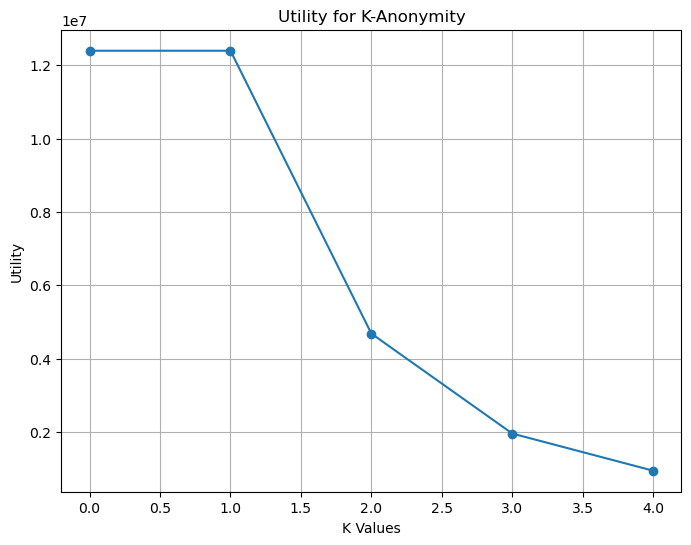

In [12]:
def calculate_k_anonymity_count(k):
    count = 0
    for _, group in grouped_dataset:
        group_size = len(group)
        if group_size < k:
            count += group_size
    return count  # Ensure this is a regular space

def calculate_k_anonymity_utility(original_data, transformed_data):
    utility_metric = np.mean(np.abs(original_data - transformed_data))
    return utility_metric  # Ensure this is a regular space


# Let's use k-values 2, 5 for demonstration
k_values = np.arange(5)
total_records = len(df)
utility_k_data = []  # Initialize utility_k_data as an empty list
for i in range(len(k_values)):
    anonymized_data = calculate_k_anonymity_count(k_values[i])
    utility_metric = calculate_k_anonymity_utility(total_records,anonymized_data)
    utility_k_data.append(utility_metric)
    
# Create line plots for k-anonymity utility
plt.figure(figsize=(8, 6))
plt.plot(k_values, utility_k_data, marker="o")
plt.xlabel("K Values")
plt.ylabel("Utility")
plt.title("Utility for K-Anonymity")
plt.grid(True)
plt.show()